# **Latent Variables in CS & Bioinformatics**

## **1. What Are They?**
Latent variables are **unobserved factors** inferred from data. They explain hidden structure in observed features.

## **2. Examples**
- In **gene expression**, a latent variable may represent a **disease state**.
- In **PCA**, **principal components** act as latent variables summarizing data.

## **3. Common Uses**
- **Graphical Models**:  
  - *HMMs, Bayesian Networks* — infer hidden states in DNA/protein data.
- **GMMs**:  
  - Cluster gene profiles (e.g., by **cell type**, **disease subtype**).
- **Autoencoders / VAEs**:  
  - Encode biological sequences or structures into latent space.

## **4. Benefits**
- **Dimensionality Reduction**  
- **Reveal Hidden Patterns**  
- **Interpret Complex Systems**

---

# **Latent Variables in Bioinformatics: Examples**

## **1. Gene Regulatory Networks**
- **Observed**: gene expression  
- **Latent**: hidden transcription factors  
- **Use**: identify co-regulated genes & pathways

## **2. scRNA-seq**
- **Observed**: single-cell RNA  
- **Latent**: cell states (e.g., stem vs. differentiated)  
- **Use**: clustering with **t-SNE**, **UMAP**

## **3. HMMs for DNA**
- **Observed**: DNA sequences  
- **Latent**: coding vs. non-coding states  
- **Use**: gene prediction (e.g., **GENSCAN**)

## **4. Protein Structure Prediction**
- **Observed**: amino acid sequences  
- **Latent**: 3D structure features  
- **Use**: VAEs generate protein folds

---

# **Evaluating Latent Variables**

## **1. Statistical Patterns**
- Use **PCA, factor analysis** to uncover hidden structures via correlations.

## **2. Perturbation Methods**
- E.g., **gene knockouts** reveal regulatory roles indirectly.

## **3. EM Algorithm**
- Iteratively estimates latent variables in **GMMs, HMMs**.

## **4. Bayesian Inference**
- **MCMC** updates beliefs about hidden variables from data.

## **5. Deep Learning**
- **Autoencoders** extract essential latent features from complex datasets.

---

# **Dimensionality Reduction & Latent Variables**

## **1. Why Reduce Dimensions?**
- **Avoid curse of dimensionality**  
- **Reduce noise & computation**  
- **Enable visualization**

## **2. Key Methods in Bioinformatics**

| **Method**        | **Type**   | **Application**                          |
|------------------|------------|-------------------------------------------|
| PCA              | Linear     | Gene/protein analysis                     |
| LDA              | Linear     | Cancer subtype classification             |
| t-SNE            | Nonlinear  | scRNA-seq clustering                      |
| UMAP             | Nonlinear  | Visualization of high-dimensional data    |
| Autoencoders     | Nonlinear  | Omics data integration, structure learning |


## **3. Explanation of PCA with Latent Variables**
PCA is one of the most common dimensionality reduction techniques that identifies **latent variables (principal components)** to represent the data in a lower-dimensional space.

### **3.1 PCA Algorithm**
#### **Step 1: Collect the Data**
Suppose we have gene expression data with $ n $ genes (features) measured across $ m $ samples:

$$
X =
\begin{bmatrix}
x_{11} & x_{12} & \dots & x_{1n} \\
x_{21} & x_{22} & \dots & x_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
x_{m1} & x_{m2} & \dots & x_{mn}
\end{bmatrix}
$$

where:
- $ X $ is an $ m \times n $ matrix.
- Each row represents a sample (e.g., a patient).
- Each column represents a gene (e.g., expression levels).

#### **Step 2: Standardize the Data**
Since genes have different expression ranges, we standardize each feature:

$$
X' = \frac{X - \mu}{\sigma}
$$

where:
- $ \mu $ is the mean of each column (gene).
- $ \sigma $ is the standard deviation of each column.

#### **Step 3: Compute the Covariance Matrix**
The covariance matrix captures relationships between genes:

$$
C = \frac{1}{m-1} X'^T X'
$$

where:
- $ C $ is an $ n \times n $ matrix (gene-to-gene relationships).

#### **Step 4: Compute Eigenvalues & Eigenvectors**
Solve:

$$
C v = \lambda v
$$

where:
- $ \lambda $ (eigenvalues) represent the variance explained by each latent variable.
- $ v $ (eigenvectors) are the **principal components** (latent directions).

#### **Step 5: Select Top Principal Components**
Choose the top $ k $ eigenvectors corresponding to the highest eigenvalues to reduce dimensions:

$$
X_{\text{reduced}} = X' V_k
$$

This projects our original data into a new feature space of reduced dimensionality.

---

## **4. Implementation of PCA in Bioinformatics**
Below is an example Python implementation of PCA using **scikit-learn**:

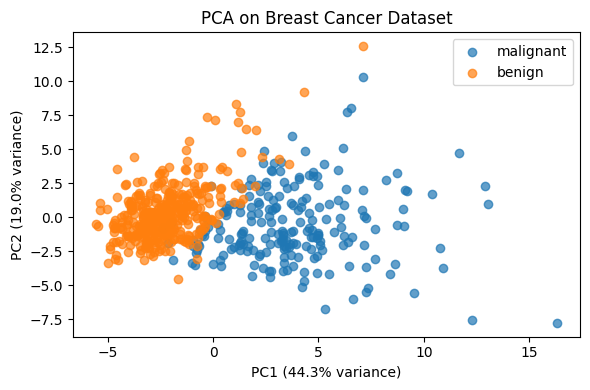

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset and labels
breast = load_breast_cancer(as_frame=True)
data = breast.data           # (569 samples × 30 features)
labels = breast.target       # 0=malignant, 1=benign
label_names = breast.target_names  # ['malignant', 'benign']

# Rename index/columns for clarity (optional)
data.index = [f"Sample_{i}" for i in range(data.shape[0])]
data.columns = [f"Gene_{i}" for i in range(data.shape[1])]

# Standardize
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# PCA → 2 components
pca = PCA(n_components=2)
pcs = pca.fit_transform(data_scaled)
explained = pca.explained_variance_ratio_

# Build a DataFrame for PC scores
pca_df = pd.DataFrame(
    pcs,
    columns=["PC1", "PC2"],
    index=data.index
)

# Plot, coloring by class. Use .iloc to index by boolean mask.
plt.figure(figsize=(6, 4))
for class_id, class_name in enumerate(label_names):
    mask = (labels == class_id).values  # boolean numpy array, length=569
    plt.scatter(
        pca_df.iloc[mask, 0],
        pca_df.iloc[mask, 1],
        alpha=0.7,
        label=class_name
    )

plt.xlabel(f"PC1 ({explained[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({explained[1]*100:.1f}% variance)")
plt.title("PCA on Breast Cancer Dataset")
plt.legend()
plt.tight_layout()
plt.show()

### 6. Alternative Methods for Dimensionality Reduction in Bioinformatics
#### 6.1 t-SNE (t-Distributed Stochastic Neighbor Embedding)
- Captures nonlinear relationships in high-dimensional data.
- Used in single-cell RNA-seq clustering.
- Preserves local structure, making it ideal for visualizing gene expression clusters.

#### Explanation of t-SNE
##### Step 1: Compute Pairwise Similarities in High Dimensions
For each data point $x_i$, define a probability distribution that measures how likely it is that another point $x_j$ is its neighbor:
$$
p_{j|i} = \frac{\exp(-\| x_i - x_j \|^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-\| x_i - x_k \|^2 / 2\sigma_i^2)}
$$
where $\sigma_i$ controls how much importance we give to nearby points.

The final probability of similarity between two points:
$$
p_{ij} = \frac{p_{j|i} + p_{i|j}}{2m}
$$

##### Step 2: Compute Similarities in Low Dimensions
We map the data to a lower-dimensional space (usually 2D) and define a $t$-distribution:
$$
q_{ij} = \frac{(1 + \| y_i - y_j \|^2)^{-1}}{\sum_{k \neq l} (1 + \| y_k - y_l \|^2)^{-1}}
$$

##### Step 3: Minimize Kullback-Leibler (KL) Divergence
$$
\text{KL}(P \| Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}
$$
Gradient descent is used to minimize this divergence.

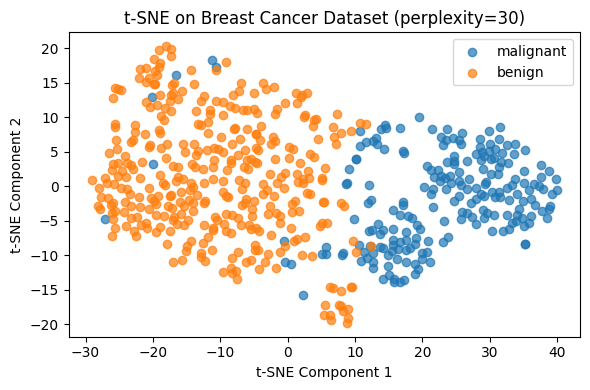

In [11]:
from sklearn.manifold import TSNE

# Apply t-SNE to 2 components
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(data_scaled)

# Convert to DataFrame
tsne_df = pd.DataFrame(
    tsne_result,
    columns=["TSNE1", "TSNE2"],
    index=data.index
)

# Plot, coloring by class
plt.figure(figsize=(6, 4))
for class_id, class_name in enumerate(label_names):
    mask = (labels == class_id).values  # boolean numpy array, length=569
    plt.scatter(
        tsne_df.iloc[mask, 0],
        tsne_df.iloc[mask, 1],
        alpha=0.7,
        label=class_name
    )

plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE on Breast Cancer Dataset (perplexity=30)")
plt.legend()
plt.tight_layout()
plt.show()

### 6.2 UMAP (Uniform Manifold Approximation and Projection)
- Faster and better than t-SNE for large datasets.
- Used in single-cell RNA sequencing and protein clustering.

#### Explanation of UMAP
##### Step 1: Construct a Graph Representation of High-Dimensional Data
We compute the nearest neighbors and define a weighted graph:
$$
p_{ij} = \exp\left(\frac{-\| x_i - x_j \|^2}{\sigma_i}\right)
$$

##### Step 2: Compute a Low-Dimensional Representation Using Graph Optimization
We optimize the low-dimensional representation by minimizing cross-entropy loss:
$$
\sum_{i,j} p_{ij} \log q_{ij} + (1 - p_{ij}) \log (1 - q_{ij})
$$

##### Step 3: Output the Low-Dimensional Representation
The result is a 2D or 3D representation where data points maintain their original neighborhood structure.

c:\Users\rezas\miniconda3\envs\weaver\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


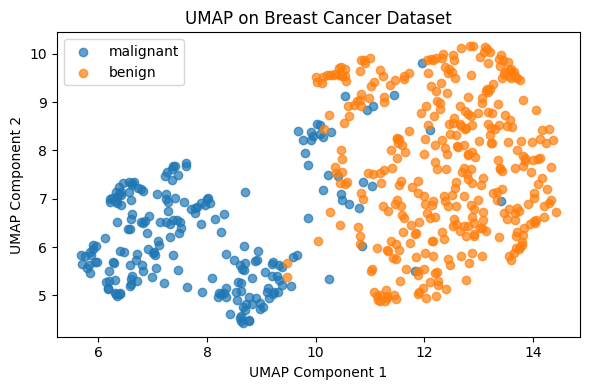

In [14]:
import umap

# Apply UMAP to 2 components
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(data_scaled)

# Convert to DataFrame
umap_df = pd.DataFrame(
    umap_result,
    columns=["UMAP1", "UMAP2"],
    index=data.index
)

# Plot, coloring by class
plt.figure(figsize=(6, 4))
for class_id, class_name in enumerate(label_names):
    mask = (labels == class_id).values  # boolean numpy array, length=569
    plt.scatter(
        umap_df.iloc[mask, 0],
        umap_df.iloc[mask, 1],
        alpha=0.7,
        label=class_name
    )

plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("UMAP on Breast Cancer Dataset")
plt.legend()
plt.tight_layout()
plt.show()

### 7. Comparison of PCA, t-SNE, and UMAP
| Method | Type | Preserves | Computational Cost | Used For |
|--------|------|-----------|--------------------|----------|
| PCA | Linear | Global Structure | Fast | Feature extraction, visualization |
| t-SNE | Nonlinear | Local Structure | Slow | Clustering, visualization |
| UMAP | Nonlinear | Both Local & Global | Faster than t-SNE | Single-cell RNA-seq, clustering |

### 8. When to Use Which?
- **PCA**: When reducing dimensions for machine learning models or feature selection.
- **t-SNE**: When visualizing clusters (e.g., identifying cell types in single-cell RNA-seq).
- **UMAP**: When needing both good visualization and preserving relationships.

---

### Conclusion
- Dimensionality reduction extracts latent variables to simplify complex biological data.
- PCA, t-SNE, and UMAP each have advantages depending on whether you need interpretability, clustering, or visualization.
- Latent variables in these methods capture hidden patterns in bioinformatics datasets like gene expression, protein interactions, and cell types.